# Тестовое задание на проект 2170

In [ ]:
# !pip install ultralytics

In [2]:
from ultralytics import YOLO
from IPython.display import Image, display, Javascript
import torch
import cv2
import random
import numpy as np
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Загрузка и обучение YOLOv8

In [12]:
model = YOLO(f'yolov8n.pt')

В качестве датасета возьмем coco128, в нем содержатся данные для 128 классов повседневных вещей (стул, кружка, холодильник и все в таком ключе)


*   все классы перечислены в coco128.yaml, также там есть ссылка, где находится датасет
*   описание датасета на сайте yolo - https://docs.ultralytics.com/ru/datasets/detect/coco/#dataset-structure


Гиперпараметры не подбирал, так как у нас нет упора на качество. Если бы от нас это требовалось, то подошла бы optuna.

Также есть советы от разработчиков YOLO по гиперпараметрам.


*   https://docs.ultralytics.com/ru/yolov5/tutorials/tips_for_best_training_results/#further-reading
*   https://docs.ultralytics.com/yolov5/tutorials/transfer_learning_with_frozen_layers/



In [15]:
# обучение на 50 эпохах, обучается довольно быстро
train_results = model.train(
    data='coco128.yaml',
    epochs=50,
    batch=16,
    imgsz=640,
    lr0=0.001,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 6.66M/6.66M [00:00<00:00, 343MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 2080.95file/s]

Dataset download success ✅ (2.5s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 105MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 258MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1931.64it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.7G      1.099      1.412      1.229        185        640: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        128        929      0.643      0.543      0.614      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.5G      1.203      1.402      1.269        200        640: 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        128        929      0.688      0.539      0.627      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.55G      1.072      1.348      1.193        195        640: 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        128        929      0.685      0.545      0.636      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.45G      1.113      1.331      1.225        214        640: 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        128        929      0.693      0.589      0.651      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.49G      1.132      1.279      1.232        251        640: 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]


                   all        128        929      0.709      0.611      0.667      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.44G      1.141      1.257      1.215        227        640: 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        128        929      0.696       0.63       0.68      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.68G      1.132      1.171      1.207        216        640: 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        128        929       0.72      0.646      0.689      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.68G      1.151      1.161       1.19        344        640: 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all        128        929       0.74       0.66      0.701       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.63G      1.091      1.191      1.181        175        640: 100%|██████████| 8/8 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]


                   all        128        929      0.748       0.67      0.712      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.69G      1.085      1.144      1.162        146        640: 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        128        929      0.742      0.677      0.719      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.53G      1.049       1.13      1.178        150        640: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        128        929      0.798      0.667      0.732      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.48G       1.05      1.028      1.154        144        640: 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        128        929      0.818      0.658      0.739      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.56G       1.08      1.084      1.192        189        640: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        128        929      0.836      0.648      0.746      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.49G      1.013       1.07      1.144        274        640: 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        128        929      0.806      0.661      0.756      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.73G      1.042      1.011      1.142        253        640: 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        128        929      0.794      0.668      0.761      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.55G     0.9704     0.9492       1.12        166        640: 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        929      0.796      0.667      0.774      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.6G       1.05     0.9948      1.167        197        640: 100%|██████████| 8/8 [00:03<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        128        929      0.779      0.685      0.782        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.75G       1.05      1.012      1.147        216        640: 100%|██████████| 8/8 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        128        929      0.781      0.704      0.792       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.58G       1.03     0.9722      1.138        187        640: 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        128        929      0.792      0.706      0.794      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.54G      1.039     0.9933      1.152        159        640: 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        128        929      0.805      0.719      0.801      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.55G      0.992     0.9249      1.112        269        640: 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        128        929      0.803      0.719      0.803      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.45G     0.9708     0.9119      1.086        204        640: 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        128        929      0.815        0.7      0.814      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.52G      0.987     0.9075      1.114        194        640: 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        128        929      0.787      0.744      0.818      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.48G       1.01     0.9246      1.122        233        640: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        128        929      0.794      0.742       0.82      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.57G      1.002     0.9461      1.106        227        640: 100%|██████████| 8/8 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all        128        929      0.799       0.75      0.823      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.72G     0.9487     0.9026      1.112        200        640: 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        128        929      0.759      0.798      0.826      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.65G     0.9887     0.8961       1.11        150        640: 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        929      0.768      0.802      0.828      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.63G     0.9557     0.8586      1.103        209        640: 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        128        929      0.774      0.783      0.828       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.65G      0.979     0.8845      1.115        218        640: 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

                   all        128        929      0.807      0.771      0.831      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.53G     0.9844      0.905      1.104        150        640: 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        128        929      0.806      0.773       0.83      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.54G      1.013     0.9299      1.126        206        640: 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        128        929      0.805      0.782      0.833      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.64G     0.9625     0.8651      1.085        220        640: 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        128        929      0.802      0.797      0.834      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.59G     0.9483     0.8666      1.102        231        640: 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        128        929       0.82      0.783      0.835      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.64G     0.9384     0.8704      1.092        186        640: 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        128        929      0.823      0.783      0.838      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.54G        0.9      0.863        1.1        192        640: 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        128        929      0.823      0.785       0.84      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.66G     0.9107     0.8265      1.097        187        640: 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        128        929      0.822      0.789       0.84      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.55G     0.9511     0.8648      1.101        224        640: 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all        128        929      0.813       0.79      0.841      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.55G      0.973     0.8705      1.103        181        640: 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        128        929      0.804      0.801      0.842      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.57G     0.9229     0.8354      1.073        244        640: 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        128        929      0.802      0.802      0.842      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.64G     0.9372     0.8599      1.092        169        640: 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        128        929      0.808      0.796      0.843      0.673


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.53G       1.01     0.9482      1.129         89        640: 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        128        929      0.805      0.803      0.842      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.46G     0.9481     0.8704      1.104        116        640: 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all        128        929      0.823      0.791      0.841      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.46G     0.9692     0.9125      1.082         96        640: 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        128        929      0.822      0.783      0.839      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.43G     0.9504     0.8561      1.073        100        640: 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        929      0.836      0.775      0.838      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.45G      0.924      0.814      1.048         74        640: 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        128        929      0.832      0.769      0.836      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.41G     0.9607      0.864      1.071        153        640: 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        128        929      0.826      0.765      0.836       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.37G     0.9348     0.8097       1.08         57        640: 100%|██████████| 8/8 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        128        929      0.824       0.77      0.836      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.45G     0.9183     0.7873      1.044         99        640: 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        929      0.815      0.772      0.836      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.45G     0.9069     0.7794      1.055        116        640: 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        128        929      0.811      0.774      0.834      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.48G     0.9252     0.7895      1.049         84        640: 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        128        929      0.804      0.778      0.834      0.669



50 epochs completed in 0.074 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


                   all        128        929      0.804      0.802      0.843      0.675
                person         61        254      0.915      0.716      0.841      0.648
               bicycle          3          6      0.899        0.5      0.604      0.476
                   car         12         46      0.826      0.391      0.546      0.311
            motorcycle          4          5          1      0.982      0.995      0.904
              airplane          5          6      0.871          1      0.995      0.995
                   bus          5          7      0.887      0.714      0.878      0.697
                 train          3          3      0.675          1      0.995      0.764
                 truck          5         12      0.895        0.5      0.631      0.455
                  boat          2          6      0.571      0.665      0.675      0.504
         traffic light          4         14       0.93      0.286       0.32       0.21
             stop sig

## Валидация модели

Валидировать будем на валидационнной подвыборке датасете coco, этот датасете побольше, чем coco128, но идея та же

In [16]:
eval_res = model.val(data="coco.yaml",)
eval_res

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:26<00:00, 191.95it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:46<00:00,  2.94it/s]


                   all       5000      36335       0.57       0.41      0.438        0.3
                person       2693      10777      0.659      0.685      0.714      0.473
               bicycle        149        314      0.359      0.315       0.27      0.145
                   car        535       1918       0.58      0.479      0.511      0.307
            motorcycle        159        367      0.634      0.474      0.565      0.323
              airplane         97        143      0.585      0.678      0.715       0.55
                   bus        189        283      0.738      0.597      0.654       0.53
                 train        157        190      0.762      0.726      0.772      0.579
                 truck        250        414      0.304      0.437      0.301      0.193
                  boat        121        424      0.424        0.3      0.287      0.148
         traffic light        191        634      0.422      0.339      0.305       0.15
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a3b6c228f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024

Выведем 3 основные метрики:

*   mAP50 (mean Average Precision at IoU threshold 0.5)
*   mAP75 (mean Average Precision at IoU threshold 0.75)
*   mAP50-95 (mean Average Precision across multiple IoU thresholds from 0.5 to 0.95)



    





In [17]:
print(f'mAP50-95: {eval_res.box.map}')
print(f'mAP50:    {eval_res.box.map50}')
print(f'mAP75:    {eval_res.box.map75}')

mAP50-95: 0.2995069133536313
mAP50:    0.4379502798474618
mAP75:    0.32219479758979175


Теперь посмотрим на картинки из валидации

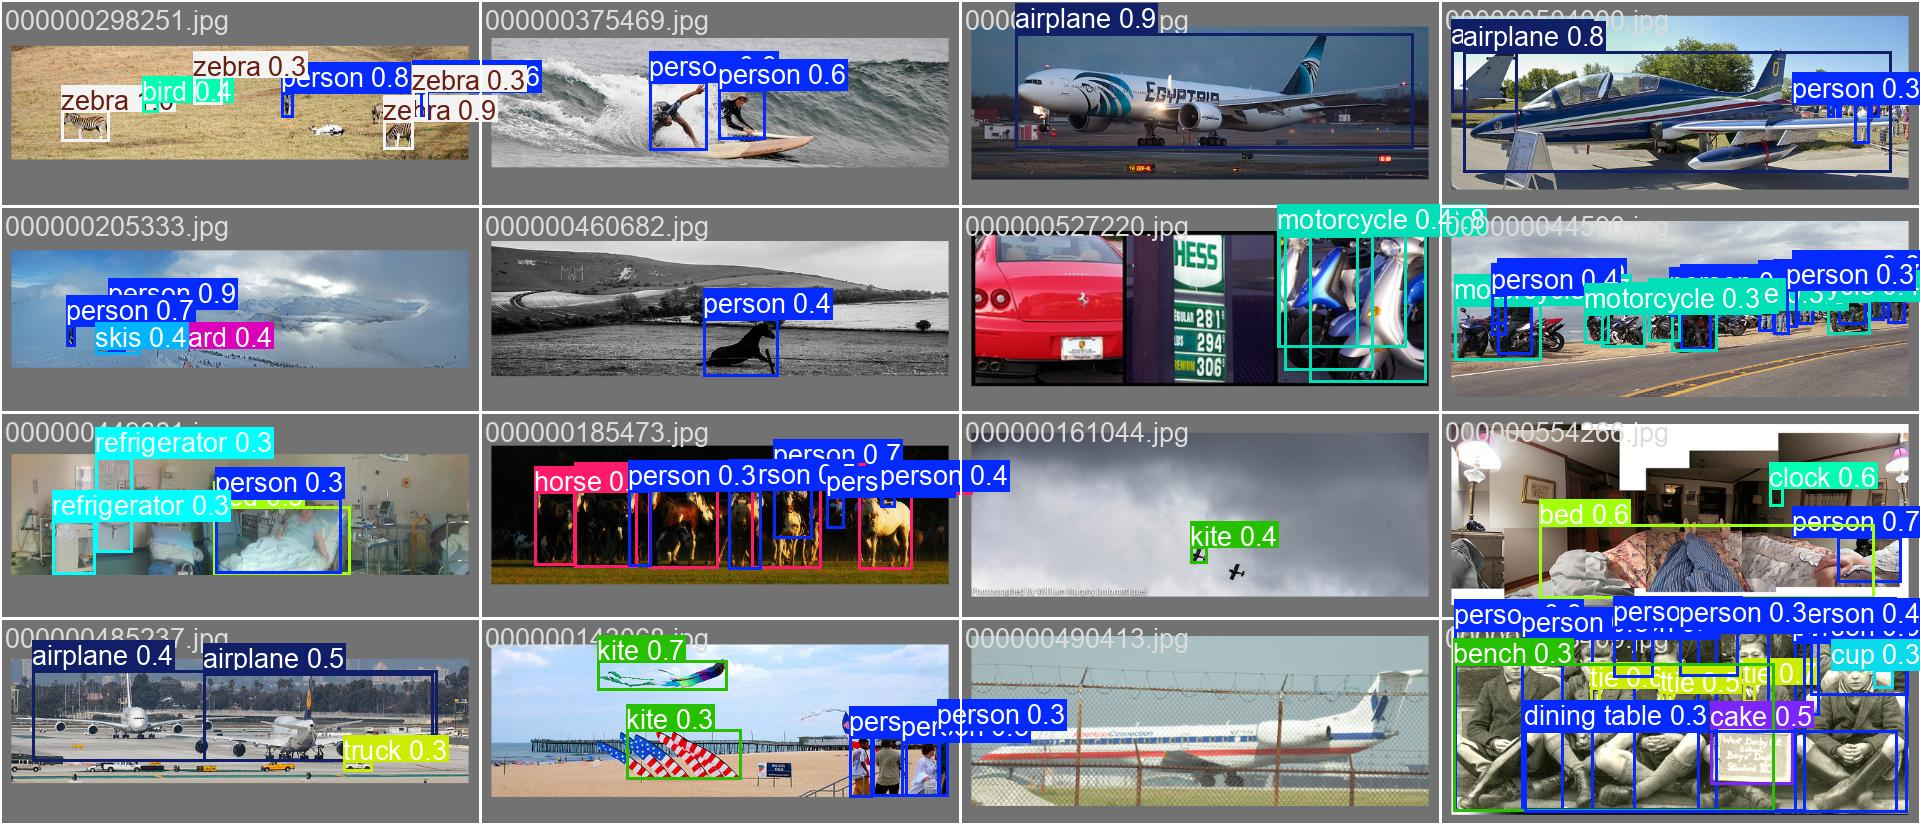

In [27]:
image_path = eval_res.save_dir / "val_batch0_pred.jpg"
display(Image(filename=str(image_path)))
# imshow не работает, потому что коллаб
# cv2.imshow(image_path, image_path)

## Использование модели с вебкамерой

Выполнял работу в google collab, поэтому пришлось найти код для работы с вебкамерой через collab, код взял из туториала (https://www.youtube.com/watch?v=ebAykr9YZ30)

In [28]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
    """
    Params:
            js_reply: JavaScript object containing image from webcam
    Returns:
            img: OpenCV BGR image
    """
    # decode base64 image
    image_bytes = b64decode(js_reply.split(',')[1])
    # convert bytes to numpy array
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    # decode numpy array into OpenCV BGR image
    img = cv2.imdecode(jpg_as_np, flags=1)

    return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
    """
    Params:
            bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
    Returns:
          bytes: Base64 image byte string
    """
    # convert array into PIL image
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    # format bbox into png for return
    bbox_PIL.save(iobuf, format='png')
    # format return string
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

    return bbox_bytes

In [29]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

Функция, которая запускает вебкамеру и yolov8 на ней

In [31]:
# запускаем видеопоток с вебкамеры через браузер
video_stream()
# текст статуса под видео
label_html = 'Capturing...'
# здесь будем хранить bounding boxes для отображения
bbox = ''

# генерируем случайные цвета для каждого класса модели
class_colors = {name: (random.randint(0,255), random.randint(0,255), random.randint(0,255))
                for name in model.names.values()}

while True:
    # получаем кадр и статус из js
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # преобразуем изображение из js в numpy массив
    frame = js_to_image(js_reply["img"])
    # создаем прозрачный слой для рисования поверх видео
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    # получаем предсказания модели для текущего кадра
    results = model.predict(frame, verbose=False)

    # обрабатываем все найденные объекты в кадре
    for result in results:
        # вытаскиваем координаты, классы и уверенность
        boxes = result.boxes.xyxy.cpu().numpy()
        classes = result.boxes.cls.cpu().numpy()
        confidences = result.boxes.conf.cpu().numpy()

        # рисуем каждый обнаруженный объект
        for box, cls_id, conf in zip(boxes, classes, confidences):
            # преобразуем координаты в целые числа
            left, top, right, bottom = map(int, box[:4])
            # получаем человекочитаемое название класса
            label = model.names[int(cls_id)]

            # рисуем прямоугольник вокруг объекта
            color = class_colors[label]
            bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), color, 2)
            # подписываем класс и уверенность модели
            bbox_array = cv2.putText(bbox_array, f"{label} {conf:.2f}", (left, top-5),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # делаем прозрачными все пиксели вне bounding boxes
    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    # преобразуем в формат для отправки в браузер
    bbox_bytes = bbox_to_bytes(bbox_array)
    # обновляем данные для следующего кадра
    bbox = bbox_bytes

<IPython.core.display.Javascript object>